11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
782/782 [==============================] - 62s 78ms/step - loss: 0.2040 - accuracy: 0.9357 - val_loss: 0.0616 - val_accuracy: 0.9821
Epoch 2/10
782/782 [==============================] - 55s 70ms/step - loss: 0.0519 - accuracy: 0.9844 - val_loss: 0.0560 - val_accuracy: 0.9834
Epoch 3/10
782/782 [==============================] - 51s 65ms/step - loss: 0.0352 - accuracy: 0.9892 - val_loss: 0.0372 - val_accuracy: 0.9891
Epoch 4/10
782/782 [==============================] - 50s 64ms/step - loss: 0.0263 - accuracy: 0.9920 - val_loss: 0.0375 - val_accuracy: 0.9892
Epoch 5/10
782/782 [==============================] - 50s 64ms/step - loss: 0.0195 - accuracy: 0.9937 - val_loss: 0.1055 - val_accuracy: 0.9715
Epoch 6/10
782/782 [==============================] - 50s 65ms/step - loss: 0.0153 - accuracy: 0.9949 - val_loss: 0.0422 - val_accuracy: 0.9911
Epoch 7/10
782/782 [==============================] - 50s 64ms/step - l

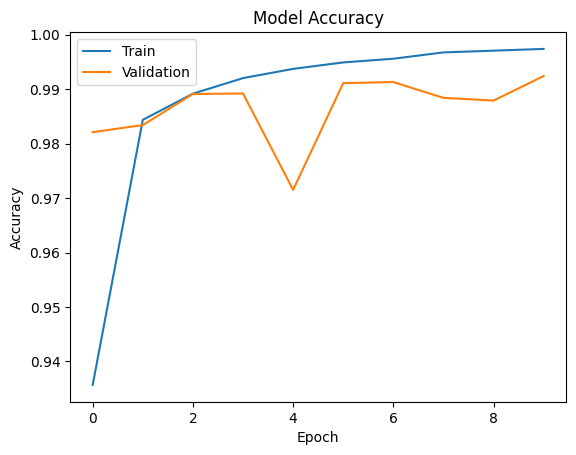

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import np_utils

# Load the MNIST dataset and split it into training and testing sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the pixel values
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Convert the labels to categorical one-hot encoding
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# Reshape the input data to a 4D tensor (samples, height, width, channels)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Split the training set into training and validation sets
X_train, X_val = X_train[:50000], X_train[50000:]
y_train, y_val = y_train[:50000], y_train[50000:]

# Create the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and save the history
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

# Plot the validation and training accuracies for the number of epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


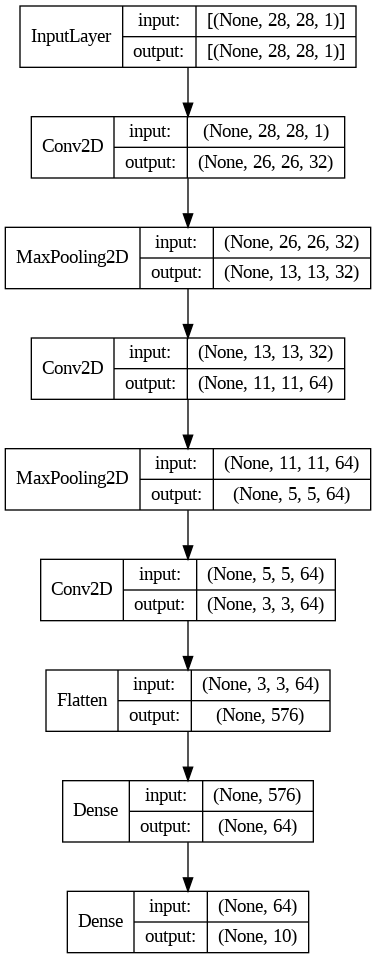

In [2]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='cnn_architecture.png', show_shapes=True, show_layer_names=False)



1/1 [==============================] - 0s 318ms/step
Predicted class: 4


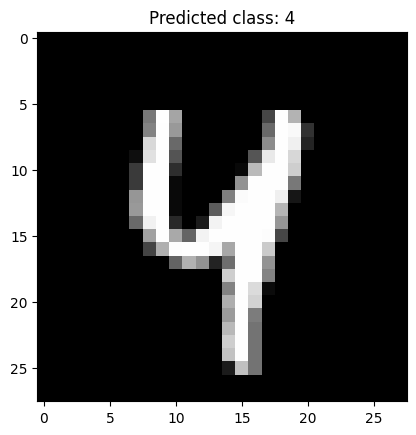

In [3]:
# Load an image from the test set
image_index = 42
test_image = X_test[image_index]

# Reshape the image to a 4D tensor for input to the model
test_image = test_image.reshape(1, 28, 28, 1)

# Make a prediction using the model
predictions = model.predict(test_image)

# Print the predicted class for the image
predicted_class = np.argmax(predictions)
print("Predicted class:", predicted_class)

# Plot the image and its predicted class
plt.imshow(X_test[image_index], cmap='gray')
plt.title("Predicted class: " + str(predicted_class))
plt.show()
